In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CSV/BallsInfo.csv')

In [3]:
df.head()

,Match ID,Innings No,Over,Ball,Batting Team,Bowling Team,Batsman,Non Striker,Bowler,Total Runs,Runs Bat,Extras,Wides,Leg Byes,Byes,No Balls,Penalty,Wicket,Player Dismissed
0,1175356,1,0,1,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,PA Patel,DL Chahar,1,1,0,0,0,0,0,0,NaN,NaN
1,1175356,1,0,2,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,0,0,0,0,0,0,NaN,NaN
2,1175356,1,0,3,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,0,0,0,0,0,0,NaN,NaN
3,1175356,1,0,4,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,0,0,0,0,0,0,NaN,NaN
4,1175356,1,0,5,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,4,4,0,0,0,0,0,0,NaN,NaN


<b>Top Scorers In IPL</b>
<br>
Looking at the list of top scorers we find a mix of players from India, Australia, West Indies, England and South Africa, surprisingly no player from New Zealand made it into the list considering how Kane Williamson was the top scorer for IPL 2018. David Warner is the list topper here and it was an important season for him, since he was making a return to IPL after the sandpaper gate controversy. Johnny Bairstow also had a decent season and was able to make it into the list besides only getting a chance in 10 matches. Players from each of the franchises made an appearence in the list excpet RR and CSK, probably because of a bit average season for their openers. While most of the players in the list are openers or top order batsman, Andre Russell and Rishabh Pant make an exception to the list, while Russell was able to keep KRK's hope alive for a fairly long time, Rishabh Pant made a big name for himself and was labelled as the next big player for the Indian Cricket Team.

In [4]:
top_scorers = pd.DataFrame()

# Filtering out the top 10 scorers
top_scorers['Players'] = pd.Series(df['Batsman'].unique())
top_scorers['Runs Season'] = top_scorers['Players'].apply(lambda player: df[df["Batsman"] == player]['Runs Bat'].sum())
top_scorers['Team'] = top_scorers['Players'].apply(lambda player: df[df['Batsman'] == player]['Batting Team'].unique()[0])
top_scorers.sort_values(by='Runs Season', ascending=False)[:10]

,Players,Runs Season,Team
16,DA Warner,692,Sunrisers Hyderabad
45,KL Rahul,593,Kings XI Punjab
36,Q de Kock,529,Mumbai Indians
28,S Dhawan,521,Delhi Capitals
25,AD Russell,510,Kolkata Knight Riders
47,CH Gayle,490,Kings XI Punjab
31,RR Pant,488,Delhi Capitals
0,V Kohli,464,Royal Challengers Bangalore
29,SS Iyer,463,Delhi Capitals
17,JM Bairstow,445,Sunrisers Hyderabad


**Observation:**
- Sunrisers Hyderabad has the top scorer of IPL 2019, DA Warner along with JM Bairstow who's at 10th position
- We can also notice that 3 out of 10 batsman are from team Delhi Capitals.
- Whereas teams like Chennai Super Kings and Rajasthan Royals don't have any player in the top 10 scorers

In [5]:
def get_runs_count(player, run_val):
    """
    Counts how many times a player scored a specific run throughout the season.
    """
   
    # Filter out the occurences for which the count needs to be done
    filt = ((df['Batsman'] == player) & (df['Runs Bat'] == run_val) & (df['Wides'] == 0))
    return df[filt]['Runs Bat'].count()


def get_runs_val(player, run_val):
    """
    Number of runs scored using the specified value
    """
    
    return get_runs_count(player, run_val) * run_val


top_scorers['Innings Played'] = top_scorers['Players'].apply(lambda player: df[df['Batsman'] == player]['Match ID'].unique().size)
top_scorers['Balls Faced'] = top_scorers['Players'].apply(lambda player: df[((df['Batsman'] == player) & (df['Wides'] == 0))]['Runs Bat'].count())
top_scorers['Strike Rate'] = (top_scorers['Runs Season'] / top_scorers['Balls Faced']) * 100

# Number of 0s, 1s, 2s, 3s, 4s, 5s and 6s players scored
top_scorers['0s'] = top_scorers['Players'].apply(get_runs_count, args=(0,))
top_scorers['1s'] = top_scorers['Players'].apply(get_runs_count, args=(1,))
top_scorers['2s'] = top_scorers['Players'].apply(get_runs_count, args=(2,))
top_scorers['3s'] = top_scorers['Players'].apply(get_runs_count, args=(3,))
top_scorers['4s'] = top_scorers['Players'].apply(get_runs_count, args=(4,))
top_scorers['5s'] = top_scorers['Players'].apply(get_runs_count, args=(5,))
top_scorers['6s'] = top_scorers['Players'].apply(get_runs_count, args=(6,))

# Runs scored using different values
top_scorers['Runs - 1s'] = top_scorers['Players'].apply(get_runs_val, args=(1,))
top_scorers['Runs - 2s'] = top_scorers['Players'].apply(get_runs_val, args=(2,))
top_scorers['Runs - 3s'] = top_scorers['Players'].apply(get_runs_val, args=(3,))
top_scorers['Runs - 4s'] = top_scorers['Players'].apply(get_runs_val, args=(4,))
top_scorers['Runs - 5s'] = top_scorers['Players'].apply(get_runs_val, args=(5,))
top_scorers['Runs - 6s'] = top_scorers['Players'].apply(get_runs_val, args=(6,))

# Breaking the runs in percentage form
top_scorers['Dot Ball Percentage'] = (top_scorers['0s'] / top_scorers['Balls Faced']) * 100
top_scorers['Boundary Percentage'] = ((top_scorers['4s'] + top_scorers['6s']) / top_scorers["Balls Faced"]) * 100
top_scorers['Others Percentage'] = ((top_scorers['1s'] + top_scorers['2s'] + top_scorers['3s'] + top_scorers['5s']) / 
                                       top_scorers['Balls Faced']) * 100

top_ten = top_scorers.sort_values(by='Runs Season', ascending=False)[:10]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AFF7D8240>,
      dtype=object)

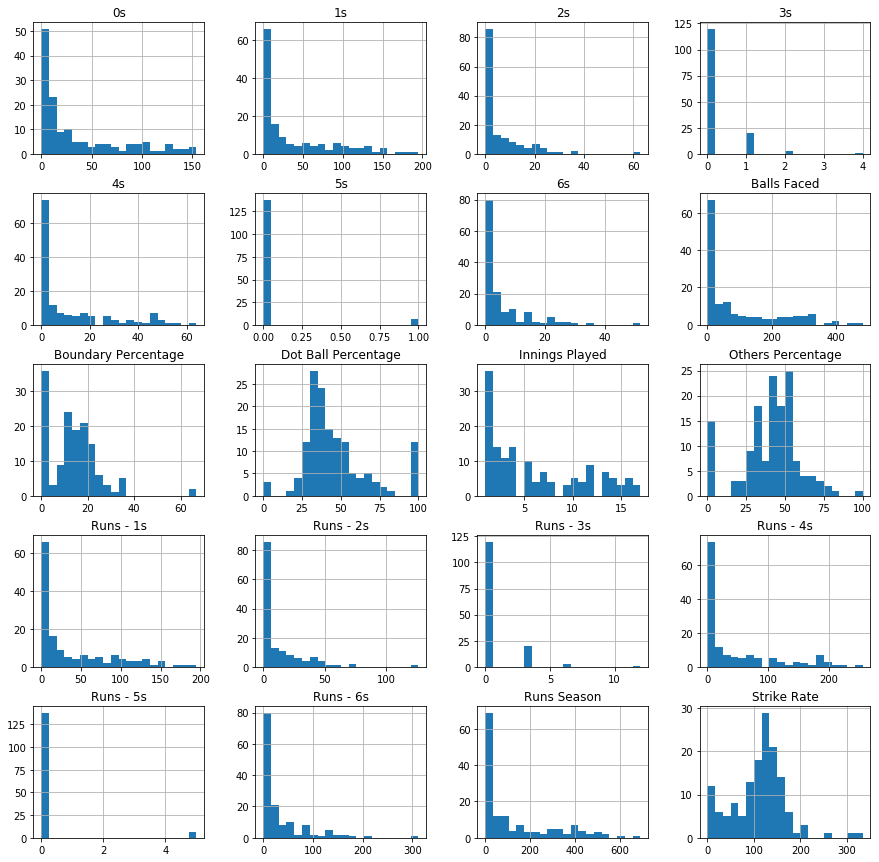

In [6]:
top_scorers.hist(figsize=(15,15), bins=20)

<b>Distribution of Runs</b>
<br>
Looking at the distribution of runs, we see how the Caribbean stars were able to light up the tournament with their 6 hitting capabilities. Both Andre Russell and Chris Gayle had a similar playing style which involves a high dot ball percentage with compensation for those dot balls coming from a high boundary percentage. On the other hand we have the likes of David Warner and Virat Kohli, both these players have a low dot ball percentage and scored bulk of their runs through 1s and 2s. Another notable mention here is Rishabh Pant who managed to hit a decent balance between dot balls, boundaries and singles. One small fact, David Warner was the only player to score 5 runs from a single delivery.

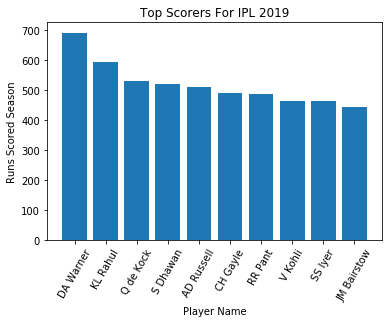

In [7]:
plt.title('Top Scorers For IPL 2019')
plt.ylabel('Runs Scored Season')
plt.xlabel('Player Name')
plt.xticks(rotation=60)
plt.bar(top_ten['Players'], top_ten['Runs Season'])
plt.show()

([<matplotlib.patches.Wedge at 0x20a80449278>,
 [Text(0.6922524354906762, 0.854860553281778, 'Dot Balls'),
  Text(-0.8475645696792857, 0.7011663855493698, 'Boundaries'),
  Text(-0.011518951542933767, -1.0999396864171016, 'Others')])

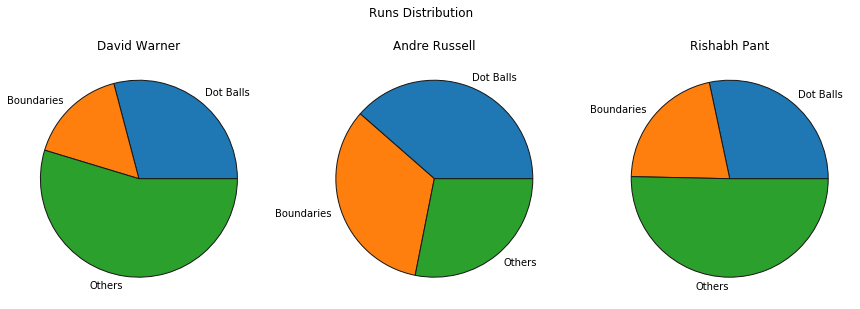

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Runs Distribution')
columns = ['Dot Ball Percentage', 'Boundary Percentage', 'Others Percentage']
ax[0].set_title('David Warner')
ax[0].pie(top_scorers.loc[16, columns], labels=['Dot Balls', 'Boundaries', 'Others'], wedgeprops={'edgecolor': '#181818'})

ax[1].set_title('Andre Russell')
ax[1].pie(top_scorers.loc[25, columns], labels=['Dot Balls', 'Boundaries', 'Others'], wedgeprops={'edgecolor': '#181818'})

ax[2].set_title('Rishabh Pant')
ax[2].pie(top_scorers.loc[31, columns], labels=['Dot Balls', 'Boundaries', 'Others'], wedgeprops={'edgecolor': '#181818'})

([<matplotlib.patches.Wedge at 0x20a80533b70>,
 [Text(0.6922524354906762, 0.854860553281778, '0'),
  Text(-1.0984924857146734, 0.057569599863106856, '1'),
  Text(-0.05756962557517941, -1.0984924843671593, '2'),
  Text(0.2399575021526359, -1.0735084523005247, '3'),
  Text(0.637209241340934, -0.8966406095809577, '4'),
  Text(0.928760689287296, -0.5894095198031558, '5'),
  Text(1.0563230427154657, -0.30689025632681854, '6')])

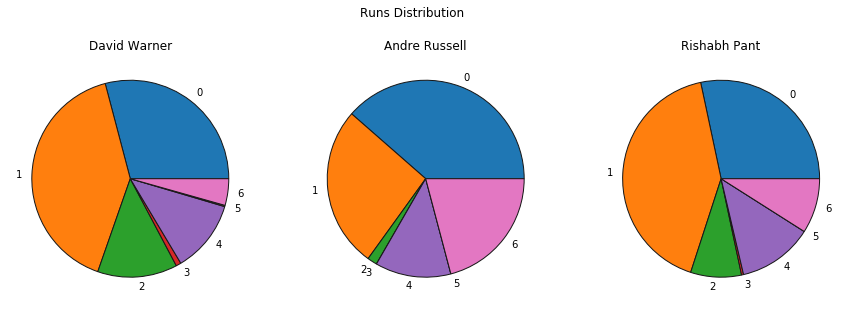

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Runs Distribution')

columns_two = ['0s', '1s', '2s', '3s', '4s', '5s', '6s']
labels = [0, 1, 2, 3, 4, 5, 6]

ax[0].set_title('David Warner')
ax[0].pie(top_scorers.loc[16, columns_two], labels=labels, wedgeprops={'edgecolor': '#181818'})

ax[1].set_title('Andre Russell')
ax[1].pie(top_scorers.loc[25, columns_two], labels=labels, wedgeprops={'edgecolor': '#181818'})

ax[2].set_title('Rishabh Pant')
ax[2].pie(top_scorers.loc[31, columns_two], labels=labels, wedgeprops={'edgecolor': '#181818'})